<a href="https://colab.research.google.com/github/mavenceslau/Challenge-Data-Science-Alura-Cash/blob/master/notebooks/Notebook_01_Limpeza_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 02 - Aprendendo com os dados: criando um modelo de previsão de inadimplência - Limpeza dos dados

Após os tratamentos adequados no banco de dados, foi gerado um arquivo .csv, com ele continuaremos nossas análises mais minuciosas com auxílio da linguagem de programação Python.

Importando bibliotecas

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import config_exibicao, config_graficos, box, remove_outlier

Com a função **config_exibicao** iremos configurar a exibição de dataframes pandas, de modo que os mesmos possam exibir o maior número de informações nas células sem cortar conteudo.

E com a função **config_graficos** vamos configurar a exibição dos gráficos.

Mais informações sobre essas funções podem ser vistas no arquivo [utils.py](https://github.com/mavenceslau/Challenge-Data-Science-Alura-Cash/blob/master/notebooks/utils.py)

In [2]:
config_exibicao()
config_graficos()

Importando a base de dados e exibindo os primeiros registros

In [3]:
url = 'https://raw.githubusercontent.com/mavenceslau/Challenge-Data-Science-Alura-Cash/master/data/interim/alura_cash.csv'
dados = pd.read_csv(url)
dados.head()

,pessoa_idade,pessoa_salario_anual,pessoa_status_propriedade,pessoa_tempo_trabalho,emprestimo_motivo,emprestimo_pontuacao,emprestimo_valor_total,emprestimo_taxa_juros,emprestimo_inadimplente,emprestimo_renda_percentual,historico_inadimplencia,historico_tempo_credito
0,22.0,50000.0,Hipotecada,0.0,Pagamento de débitos,A,12800.0,5.79,0.0,0.26,N,2.0
1,26.0,84996.0,Alugada,0.0,Médico,B,9000.0,11.26,0.0,0.11,N,2.0
2,24.0,55782.0,Alugada,3.0,Melhora do lar,A,17000.0,7.51,0.0,0.30,N,2.0
3,25.0,125000.0,Própria,9.0,Pessoal,B,25000.0,10.59,0.0,0.20,N,2.0
4,23.0,44340.0,Própria,0.0,Empreendimento,C,3000.0,12.98,0.0,0.07,S,3.0


In [4]:
print(f'O dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset possui 34501 linhas e 12 colunas


## Analisando os dados

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34501 entries, 0 to 34500
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pessoa_idade                 34177 non-null  float64
 1   pessoa_salario_anual         34162 non-null  float64
 2   pessoa_status_propriedade    34170 non-null  object 
 3   pessoa_tempo_trabalho        33247 non-null  float64
 4   emprestimo_motivo            34186 non-null  object 
 5   emprestimo_pontuacao         34188 non-null  object 
 6   emprestimo_valor_total       34170 non-null  float64
 7   emprestimo_taxa_juros        30871 non-null  float64
 8   emprestimo_inadimplente      34158 non-null  float64
 9   emprestimo_renda_percentual  34182 non-null  float64
 10  historico_inadimplencia      34131 non-null  object 
 11  historico_tempo_credito      34497 non-null  float64
dtypes: float64(8), object(4)
memory usage: 3.2+ MB


As colunas **pessoa_idade**, **pessoa_tempo_trabalho** e **emprestimo_inadimplente** por algum motivo durante a exportação dos dados não está como tipo inteiro, logo irei fazer a conversão dos tipos, mas antes devemos verificar se há dados nulos no dataset

In [6]:
descricao = dados.describe().T
descricao.style.background_gradient(cmap = 'crest').format(precision = 2)

,count,mean,std,min,25%,50%,75%,max
pessoa_idade,34177.00,27.73,6.35,20.00,23.00,26.00,30.00,144.00
pessoa_salario_anual,34162.00,66028.69,61405.05,4000.00,38493.00,55000.00,79200.00,6000000.00
pessoa_tempo_trabalho,33247.00,4.79,4.14,0.00,2.00,4.00,7.00,123.00
emprestimo_valor_total,34170.00,9590.58,6320.43,500.00,5000.00,8000.00,12200.00,35000.00
emprestimo_taxa_juros,30871.00,11.01,3.24,5.42,7.90,10.99,13.47,23.22
emprestimo_inadimplente,34158.00,0.22,0.41,0.00,0.00,0.00,0.00,1.00
emprestimo_renda_percentual,34182.00,0.17,0.11,0.00,0.09,0.15,0.23,0.83
historico_tempo_credito,34497.00,5.81,4.06,2.00,3.00,4.00,8.00,30.00


### Verifcando a existência de dados nulos

In [7]:
dados.isnull().sum()

pessoa_idade                    324
pessoa_salario_anual            339
pessoa_status_propriedade       331
pessoa_tempo_trabalho          1254
emprestimo_motivo               315
emprestimo_pontuacao            313
emprestimo_valor_total          331
emprestimo_taxa_juros          3630
emprestimo_inadimplente         343
emprestimo_renda_percentual     319
historico_inadimplencia         370
historico_tempo_credito           4
dtype: int64

Podemos ver que existem muitos dados nulos no nosso dataset. Existem algumas maneiras de resolver essa questão. 

Uma estratégia seria remover todos os dados nulos, que ao meu ver não é recomendado, pois haveria muita perda de dados. 

Outra abordagem seria no lugar dos dados nulos, preencher com a informação da média da coluna correspondente. Irei usar esse método.

Para as colunas numéricas usarei as médias e para as colunas categóricas usarei o dado mais frequente.

In [8]:
# Substituindo os dados faltantes das colunas numéricas pelas médias de cada coluna

numericas = ['pessoa_idade', 'pessoa_salario_anual', 'pessoa_tempo_trabalho', 'emprestimo_valor_total',
             'emprestimo_taxa_juros', 'emprestimo_renda_percentual', 'historico_tempo_credito']

for numero in numericas:
       dados[numero].fillna(dados[numero].mean(), inplace = True)

A coluna **emprestimo_inadimplente** é nossa coluna alvo(target) para o modelo de machine learning, por isso os dados nulos da mesma serão removidos

In [9]:
dados.dropna(subset = 'emprestimo_inadimplente', inplace = True)

Exibindo a frequencia de registros das variáveis categóricas

In [10]:
categorias = ['pessoa_status_propriedade', 'emprestimo_motivo', 'emprestimo_pontuacao', 'historico_inadimplencia']

for cat in categorias:
    print(25*'--')
    print(dados[cat].value_counts())
    print(25*'--')

--------------------------------------------------
Alugada       17080
Hipotecada    13983
Própria        2689
Outros          109
Name: pessoa_status_propriedade, dtype: int64
--------------------------------------------------
--------------------------------------------------
Educativo               6702
Médico                  6317
Empreendimento          5932
Pessoal                 5729
Pagamento de débitos    5424
Melhora do lar          3757
Name: emprestimo_motivo, dtype: int64
--------------------------------------------------
--------------------------------------------------
A    11224
B    10849
C     6710
D     3767
E     1001
F      252
G       64
Name: emprestimo_pontuacao, dtype: int64
--------------------------------------------------
--------------------------------------------------
N    27866
S     5960
Name: historico_inadimplencia, dtype: int64
--------------------------------------------------


In [11]:
# Substituindo os dados faltantes das colunas categóricas pelos valores mais comuns de cada coluna, ou seja, a moda.

categorias = ['pessoa_status_propriedade', 'emprestimo_motivo', 'emprestimo_pontuacao', 'historico_inadimplencia']

for cat in categorias:
    dados[cat].fillna(dados[cat].mode()[0], inplace = True)

Verificando a existência de dados nulos após os procedimentos

In [12]:
dados.isnull().sum()

pessoa_idade                   0
pessoa_salario_anual           0
pessoa_status_propriedade      0
pessoa_tempo_trabalho          0
emprestimo_motivo              0
emprestimo_pontuacao           0
emprestimo_valor_total         0
emprestimo_taxa_juros          0
emprestimo_inadimplente        0
emprestimo_renda_percentual    0
historico_inadimplencia        0
historico_tempo_credito        0
dtype: int64

### Verifcando a existência de dados duplicados

In [13]:
dados.duplicated().value_counts()
print(f'Existem {dados.duplicated().value_counts()[1]} registros duplicados no dataset')

Existem 165 registros duplicados no dataset


In [14]:
dados.drop_duplicates(inplace = True)

In [15]:
dados.duplicated().value_counts()

False    33993
dtype: int64

Agora que o dataset não possui dados nulos, podemos alterar o tipo de dados das colunas **pessoa_idade**, **pessoa_tempo_trabalho** e **emprestimo_inadimplente** para inteiro.

In [16]:
valores_int = ['pessoa_idade', 'pessoa_tempo_trabalho', 'emprestimo_inadimplente']

for valor in valores_int:
    dados[valor] = dados[valor].astype('int')

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33993 entries, 0 to 34500
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pessoa_idade                 33993 non-null  int32  
 1   pessoa_salario_anual         33993 non-null  float64
 2   pessoa_status_propriedade    33993 non-null  object 
 3   pessoa_tempo_trabalho        33993 non-null  int32  
 4   emprestimo_motivo            33993 non-null  object 
 5   emprestimo_pontuacao         33993 non-null  object 
 6   emprestimo_valor_total       33993 non-null  float64
 7   emprestimo_taxa_juros        33993 non-null  float64
 8   emprestimo_inadimplente      33993 non-null  int32  
 9   emprestimo_renda_percentual  33993 non-null  float64
 10  historico_inadimplencia      33993 non-null  object 
 11  historico_tempo_credito      33993 non-null  float64
dtypes: float64(5), int32(3), object(4)
memory usage: 3.0+ MB


### Verifcando a existência de outliers

Outliers são informações fora do padrão dos dados, discrepantes. Podem ocorrer por erros na captura dos dados, na digitação das informações ou apenas alguma exceção nos dados.

Para melhor trabalharmos nossa análise os outliers devem ser removidos. Para isso irei utilizar a abordagem dos Intervalos Interquartis, que
é a diferença entre o terceiro e primeiro quartis: **IIR = Q3−Q1**.

In [18]:
descricao = dados.describe().T
descricao.style.background_gradient(cmap = 'crest').format(precision = 2)

,count,mean,std,min,25%,50%,75%,max
pessoa_idade,33993.00,27.73,6.31,20.00,23.00,26.00,30.00,144.00
pessoa_salario_anual,33993.00,66045.91,61182.56,4000.00,39000.00,55236.00,78996.00,6000000.00
pessoa_tempo_trabalho,33993.00,4.76,4.07,0.00,2.00,4.00,7.00,123.00
emprestimo_valor_total,33993.00,9600.64,6292.72,500.00,5000.00,8000.00,12000.00,35000.00
emprestimo_taxa_juros,33993.00,11.02,3.07,5.42,8.49,11.01,13.11,23.22
emprestimo_inadimplente,33993.00,0.22,0.41,0.00,0.00,0.00,0.00,1.00
emprestimo_renda_percentual,33993.00,0.17,0.11,0.00,0.09,0.15,0.23,0.83
historico_tempo_credito,33993.00,5.81,4.06,2.00,3.00,4.00,8.00,30.00


Com as descrições dos dados podemos notar alguns possiveis outliers, como por exemplo a variável **pessoa_idade**, onde temos o valor máximo de 144 anos.

Usando um gráfico de Boxplot, visualmente podemor ver os possíveis dados descrepantes.

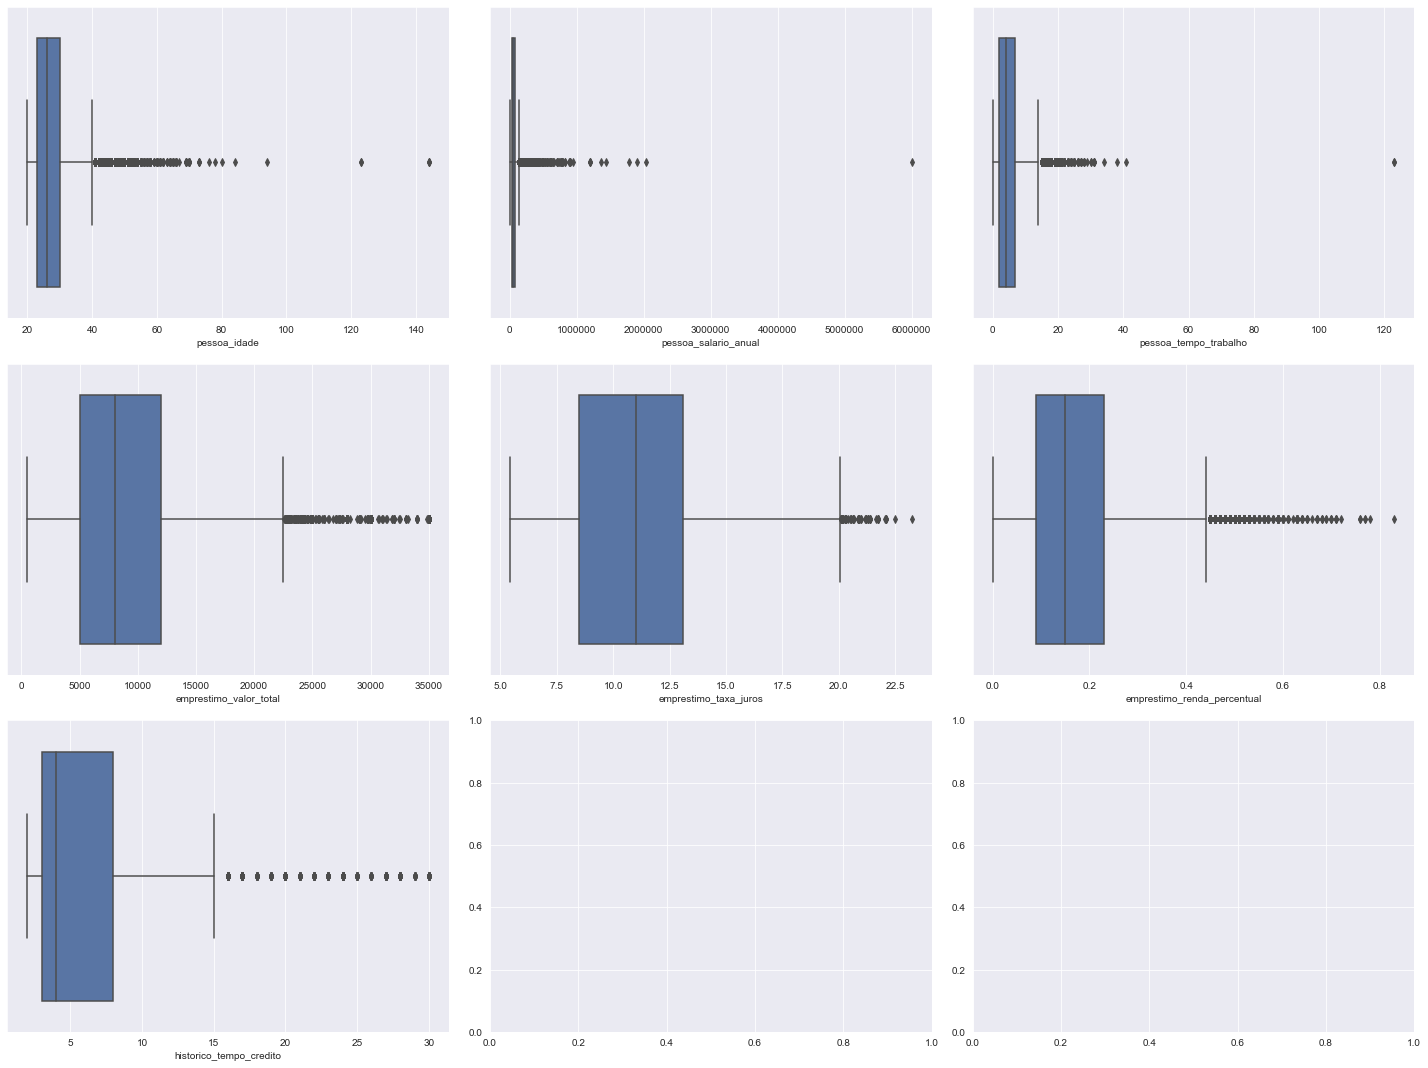

In [19]:
outliers = ['pessoa_idade', 'pessoa_salario_anual', 'pessoa_tempo_trabalho', 'emprestimo_valor_total',
            'emprestimo_taxa_juros', 'emprestimo_renda_percentual', 'historico_tempo_credito']
ncols = len(outliers)
fig, axes = plt.subplots(3, 3, figsize = (20, 15))
custom_params = {"axes.spines.right": False,"axes.spines.left": False, "axes.spines.top": False}
sns.set_theme(context="notebook", style="white", rc=custom_params)

for outlier, ax in zip(outliers, axes.flatten()):  
    sns.boxplot(data = dados, x = outlier, ax = ax)
    
plt.tight_layout()    

Na variável **pessoa_idade** irei deixar apenas registros onde a idade seja menor que 100 anos.

In [20]:
dados = dados[dados['pessoa_idade'] <= 100]
dados.pessoa_idade.unique()

array([22, 26, 24, 25, 23, 29, 27, 32, 36, 30, 28, 33, 21, 31, 35, 34, 47,
       51, 37, 38, 58, 52, 49, 41, 40, 46, 42, 43, 39, 44, 45, 48, 53, 65,
       55, 57, 54, 50, 56, 69, 84, 61, 59, 20, 70, 67, 76, 62, 64, 94, 66,
       60, 78, 73, 63, 80])

Na variável **pessoa_tempo_trabalho** deixei somente os registros onde o tempo de trabalho é de 30 anos ou menos.

In [21]:
dados = dados[dados['pessoa_tempo_trabalho'] <= 30]
dados.pessoa_tempo_trabalho.unique()

array([ 0,  3,  9,  4,  8,  6,  1, 14, 13, 12,  2, 15, 11,  5,  7, 19, 10,
       20, 23, 17, 22, 21, 27, 16, 18, 28, 26, 24, 25, 30, 29])

Já na variável **pessoa_salario_anual** utilizei a abordagem do **Intervalo Inter Quartil (IIR)** para remover os dados descrepantes.

In [22]:
variavel = dados.pessoa_salario_anual.name
dados = remove_outlier(dados, variavel, variavel)
descricao = dados.describe().T
descricao.style.background_gradient(cmap = 'crest').format(precision = 2)

,count,mean,std,min,25%,50%,75%,max
pessoa_idade,32316.00,27.58,6.10,20.00,23.00,26.00,30.00,94.00
pessoa_salario_anual,32316.00,58422.27,26946.56,4000.00,38000.00,54000.00,75000.00,138600.00
pessoa_tempo_trabalho,32316.00,4.67,3.87,0.00,2.00,4.00,7.00,29.00
emprestimo_valor_total,32316.00,9293.04,6004.48,500.00,5000.00,8000.00,12000.00,35000.00
emprestimo_taxa_juros,32316.00,11.01,3.07,5.42,8.49,11.01,13.11,23.22
emprestimo_inadimplente,32316.00,0.22,0.42,0.00,0.00,0.00,0.00,1.00
emprestimo_renda_percentual,32316.00,0.17,0.11,0.01,0.09,0.15,0.23,0.83
historico_tempo_credito,32316.00,5.73,4.02,2.00,3.00,4.00,8.00,30.00


Gráficos de Boxplot depois da remoção dos outliers.

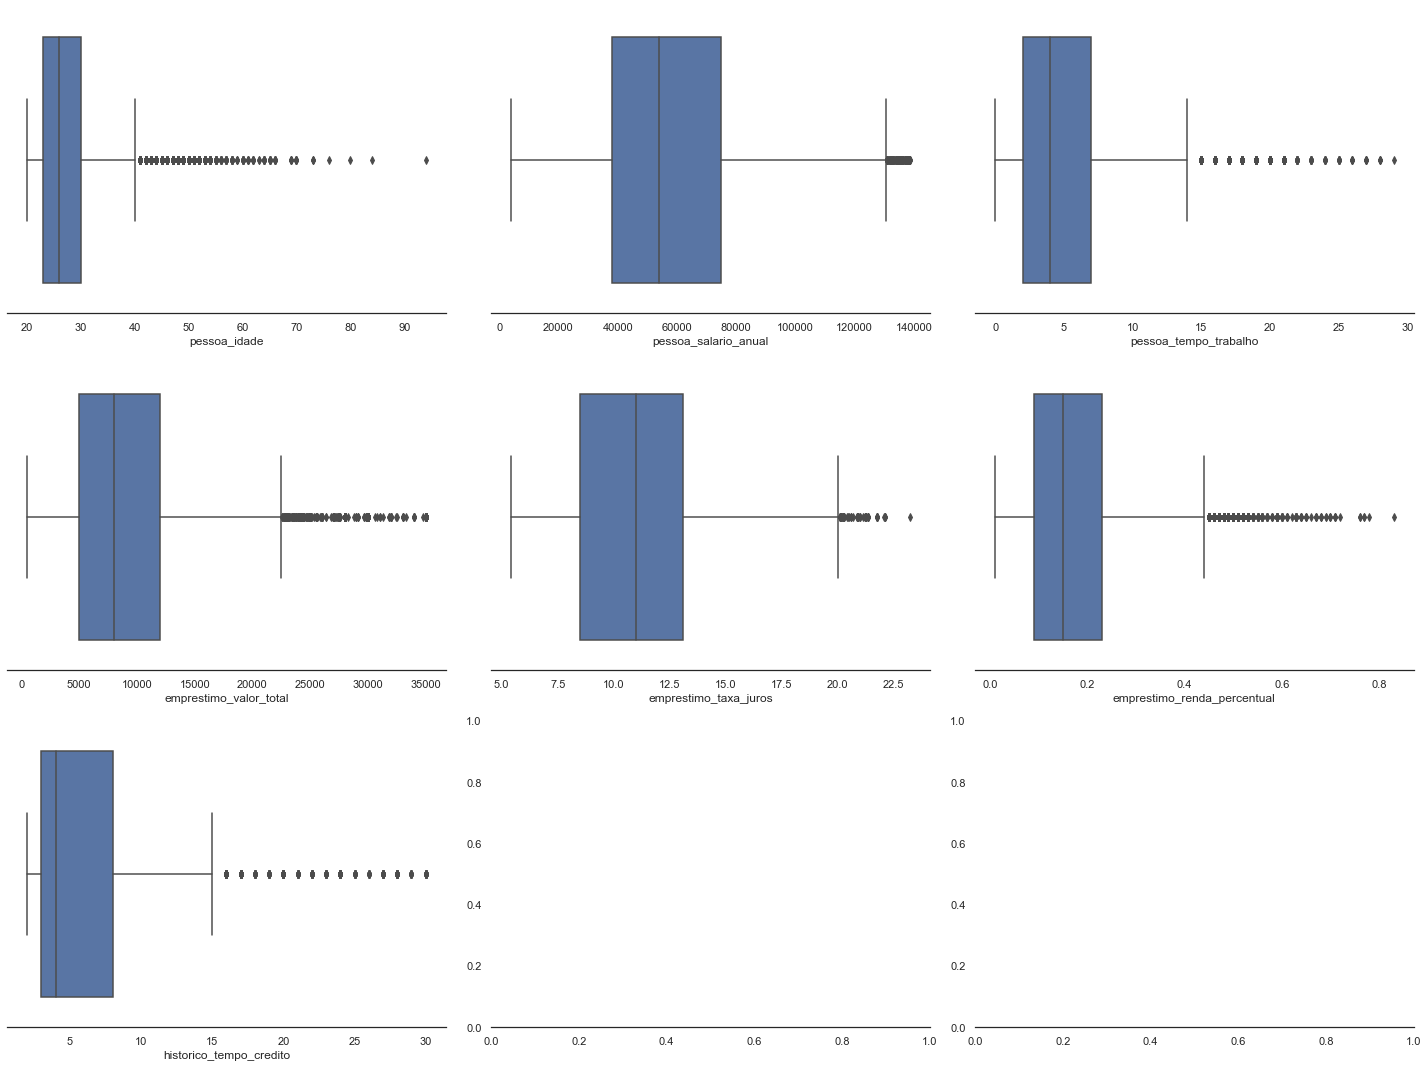

In [23]:
outliers = ['pessoa_idade', 'pessoa_salario_anual', 'pessoa_tempo_trabalho', 'emprestimo_valor_total',
            'emprestimo_taxa_juros', 'emprestimo_renda_percentual', 'historico_tempo_credito']
ncols = len(outliers)
fig, axes = plt.subplots(3, 3, figsize = (20, 15))
custom_params = {"axes.spines.right": False,"axes.spines.left": False, "axes.spines.top": False}
sns.set_theme(context="notebook", style="white", rc=custom_params)

for outlier, ax in zip(outliers, axes.flatten()):  
    sns.boxplot(data = dados, x = outlier, ax = ax)
    
plt.tight_layout()

Exportar os dados limpos para um novo arquivo csv, onde podermos analisar mais sobre o conjunto de dados.

In [26]:
# Exportando os Dados para um arquivo .csv

dir = '../data/processed/alura_cash_tratado.csv'
dados.to_csv(path_or_buf = dir, index = False)